## 멜론 시대별 차트로 보는 장르별 선호 흐름

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import time

In [14]:
names = ['Date', '애시드/퓨전/팝', '드라마OST', '클래식', '인디음악', '영화OST', '발라드', '댄스', '록/메탈',
         'R&B/Soul', '일렉트로니카', '랩/힙합', 'EDM', 'POP', 'J-POP', '성인가요', '재즈', '뉴에이지',
         '포크/블루스', '만화/게임OST', '-']
drop_list = []
## 100 건 이상이 있는 장르에 대해서만 월별추세 검색
target_genre = ['발라드', '댄스', '록/메탈', 'R&B/Soul','랩/힙합','포크/블루스','인디음악','드라마OST','영화OST','POP','일렉트로니카']
##
key = '드라마OST'
for genre in names:
    if genre != key and genre != 'Date':
        drop_list.append(genre)

In [15]:
def get_data_frame():
    # print("current : ", year, month)
    load_file = "C:/Users/jay/Jay/기말플젝/final_data/final.csv"

    try:
        data = pd.read_csv(load_file, encoding='cp949',
                           names=names, header=None)
    except UnicodeError:
        try:
            data = pd.read_csv(load_file, encoding='utf-8',
                               names=names, header=None)
        except Exception as e:
            print(e)
    return data

In [33]:
def get_yearly_data(result, year, data, keys):
    start_month = (year - 2000) * 12
    end_month = start_month + 12 if year != 2019 else start_month + 11
    for i in range(start_month, end_month):
        row = []
        for key in keys:
            if key == 'Date':
                data.get(key)[i] = "2000-"+data.get(key)[i].split("-")[1]
            row.append(data.get(key)[i])
            # print(data.get(key)[i])
        result.append(row)

In [34]:
def get_monthly_data(result, year):
    monthly_df = pd.DataFrame(result, columns=names)
    monthly_df['Date'] = pd.to_datetime(monthly_df['Date'], dayfirst=True, errors='coerce')
    monthly_df = monthly_df.set_index('Date')
    return monthly_df

In [32]:
def get_analysis(st_year, end_year):
    data = get_data_frame()
    elements = data.keys()
    data_list =[]
    for year in range(st_year, end_year):
        result = []
        get_yearly_data(result, year, data, elements)
        data_list.append(get_monthly_data(result, year))
    for key in target_genre:
        drop_list = []
        for genre in names:
            if genre != key and genre != 'Date':
                drop_list.append(genre)
        for df in data_list:
            monthly_df = df
            monthly_df = monthly_df.drop(drop_list, axis=1, inplace=False)
            print(monthly_df)
            monthly_df[key] = pd.to_numeric(monthly_df[key], errors='coerce')
            monthly_open = monthly_df[key].plot(title="%d\'s Record For %s"%(year, key))
            fig = monthly_open.get_figure()
            fig.set_size_inches(50,10)

In [18]:
data = get_data_frame()
mellon_df = pd.DataFrame(data, columns=names)
elements = get_keys(data)

In [19]:
print("멜론 시대별 차트 데이터 크기 : ", mellon_df.shape) ## 20년 * 12 - 1(2019년 12월 제외)

멜론 시대별 차트 데이터 크기 :  (239, 21)


In [20]:
print(mellon_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 238
Data columns (total 21 columns):
Date        239 non-null object
애시드/퓨전/팝    239 non-null float64
드라마OST      239 non-null float64
클래식         239 non-null float64
인디음악        239 non-null float64
영화OST       239 non-null float64
발라드         239 non-null float64
댄스          239 non-null float64
록/메탈        239 non-null float64
R&B/Soul    239 non-null float64
일렉트로니카      239 non-null float64
랩/힙합        239 non-null float64
EDM         239 non-null float64
POP         239 non-null float64
J-POP       239 non-null float64
성인가요        239 non-null float64
재즈          239 non-null float64
뉴에이지        239 non-null float64
포크/블루스      239 non-null float64
만화/게임OST    239 non-null float64
-           239 non-null float64
dtypes: float64(20), object(1)
memory usage: 41.1+ KB
None


In [22]:
mellon_df['Date'] = pd.to_datetime(mellon_df['Date'], dayfirst=True, errors='coerce')
mellon_df['Date'] = mellon_df['Date']

In [25]:
mellon_df  = mellon_df.dropna(axis = 0)

In [26]:
mellon_df

,Date,애시드/퓨전/팝,드라마OST,클래식,인디음악,영화OST,발라드,댄스,록/메탈,R&B/Soul,...,랩/힙합,EDM,POP,J-POP,성인가요,재즈,뉴에이지,포크/블루스,만화/게임OST,-
0,2000-01-01,0.0,0.000000,0.0,0.000000,0.000000,34.615385,28.205128,19.230769,3.846154,...,10.256410,0.0,0.000000,0.0,0.000000,0.0,1.282051,1.282051,0.000000,1.282051
1,2000-02-01,0.0,0.000000,0.0,1.515152,0.000000,34.848485,33.333333,18.181818,3.030303,...,7.575758,0.0,0.000000,0.0,0.000000,0.0,1.515152,0.000000,0.000000,0.000000
2,2000-03-01,0.0,1.470588,0.0,1.470588,0.000000,41.176471,26.470588,17.647059,2.941176,...,7.352941,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.470588
3,2000-04-01,0.0,1.408451,0.0,1.408451,0.000000,39.436620,30.985915,15.492958,4.225352,...,7.042254,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,2000-05-01,0.0,1.333333,0.0,0.000000,0.000000,40.000000,29.333333,12.000000,6.666667,...,10.666667,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2019-07-01,0.0,4.166667,0.0,8.333333,3.333333,29.166667,15.833333,5.833333,8.333333,...,10.833333,0.0,10.833333,0.0,0.833333,0.0,0.000000,1.666667,0.000000,0.000000
235,2019-08-01,0.0,11.023622,0.0,7.874016,1.574803,29.133858,14.960630,3.937008,7.874016,...,11.811024,0.0,7.874016,0.0,0.787402,0.0,0.000000,2.362205,0.000000,0.000000
236,2019-09-01,0.0,10.606061,0.0,11.363636,1.515152,33.333333,11.363636,7.575758,6.818182,...,9.090909,0.0,6.818182,0.0,0.000000,0.0,0.000000,0.757576,0.000000,0.000000
237,2019-10-01,0.0,8.064516,0.0,9.677419,0.806452,37.096774,8.870968,8.870968,8.064516,...,9.677419,0.0,5.645161,0.0,0.000000,0.0,0.000000,2.419355,0.000000,0.000000


In [27]:
mellon_df = mellon_df.set_index('Date')

In [28]:
mellon_df.index.is_unique

True

In [29]:
mellon_df

,애시드/퓨전/팝,드라마OST,클래식,인디음악,영화OST,발라드,댄스,록/메탈,R&B/Soul,일렉트로니카,랩/힙합,EDM,POP,J-POP,성인가요,재즈,뉴에이지,포크/블루스,만화/게임OST,-
Date,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.0,0.000000,0.0,0.000000,0.000000,34.615385,28.205128,19.230769,3.846154,0.000000,10.256410,0.0,0.000000,0.0,0.000000,0.0,1.282051,1.282051,0.000000,1.282051
2000-02-01,0.0,0.000000,0.0,1.515152,0.000000,34.848485,33.333333,18.181818,3.030303,0.000000,7.575758,0.0,0.000000,0.0,0.000000,0.0,1.515152,0.000000,0.000000,0.000000
2000-03-01,0.0,1.470588,0.0,1.470588,0.000000,41.176471,26.470588,17.647059,2.941176,0.000000,7.352941,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.470588
2000-04-01,0.0,1.408451,0.0,1.408451,0.000000,39.436620,30.985915,15.492958,4.225352,0.000000,7.042254,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2000-05-01,0.0,1.333333,0.0,0.000000,0.000000,40.000000,29.333333,12.000000,6.666667,0.000000,10.666667,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,0.0,4.166667,0.0,8.333333,3.333333,29.166667,15.833333,5.833333,8.333333,0.833333,10.833333,0.0,10.833333,0.0,0.833333,0.0,0.000000,1.666667,0.000000,0.000000
2019-08-01,0.0,11.023622,0.0,7.874016,1.574803,29.133858,14.960630,3.937008,7.874016,0.787402,11.811024,0.0,7.874016,0.0,0.787402,0.0,0.000000,2.362205,0.000000,0.000000
2019-09-01,0.0,10.606061,0.0,11.363636,1.515152,33.333333,11.363636,7.575758,6.818182,0.757576,9.090909,0.0,6.818182,0.0,0.000000,0.0,0.000000,0.757576,0.000000,0.000000


### 대략적인 년, 월

In [377]:
print( int((mellon_df.index.max()- mellon_df.index.min()).days/30/12),"년")

20 년


In [378]:
print( int((mellon_df.index.max()- mellon_df.index.min()).days/30),"개월")

241 개월


### 자료형을 object => 숫자로 바꿔줌

In [379]:
for key in mellon_df.keys():
    if key != 'Date':
        mellon_df[key] = pd.to_numeric(mellon_df[key], errors='coerce')
print(mellon_df.dtypes)

애시드/퓨전/팝    float64
드라마OST      float64
클래식         float64
인디음악        float64
영화OST       float64
발라드         float64
댄스          float64
록/메탈        float64
R&B/Soul    float64
일렉트로니카      float64
랩/힙합        float64
EDM         float64
POP         float64
J-POP       float64
성인가요        float64
재즈          float64
뉴에이지        float64
포크/블루스      float64
만화/게임OST    float64
-           float64
dtype: object


### 드라마OST, 만화/게임OST, 영화OST등은 다른장르와 중복이 많고 특정 장르가 아니라고 생각하여 제외

C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48660 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54252 missing from current font.

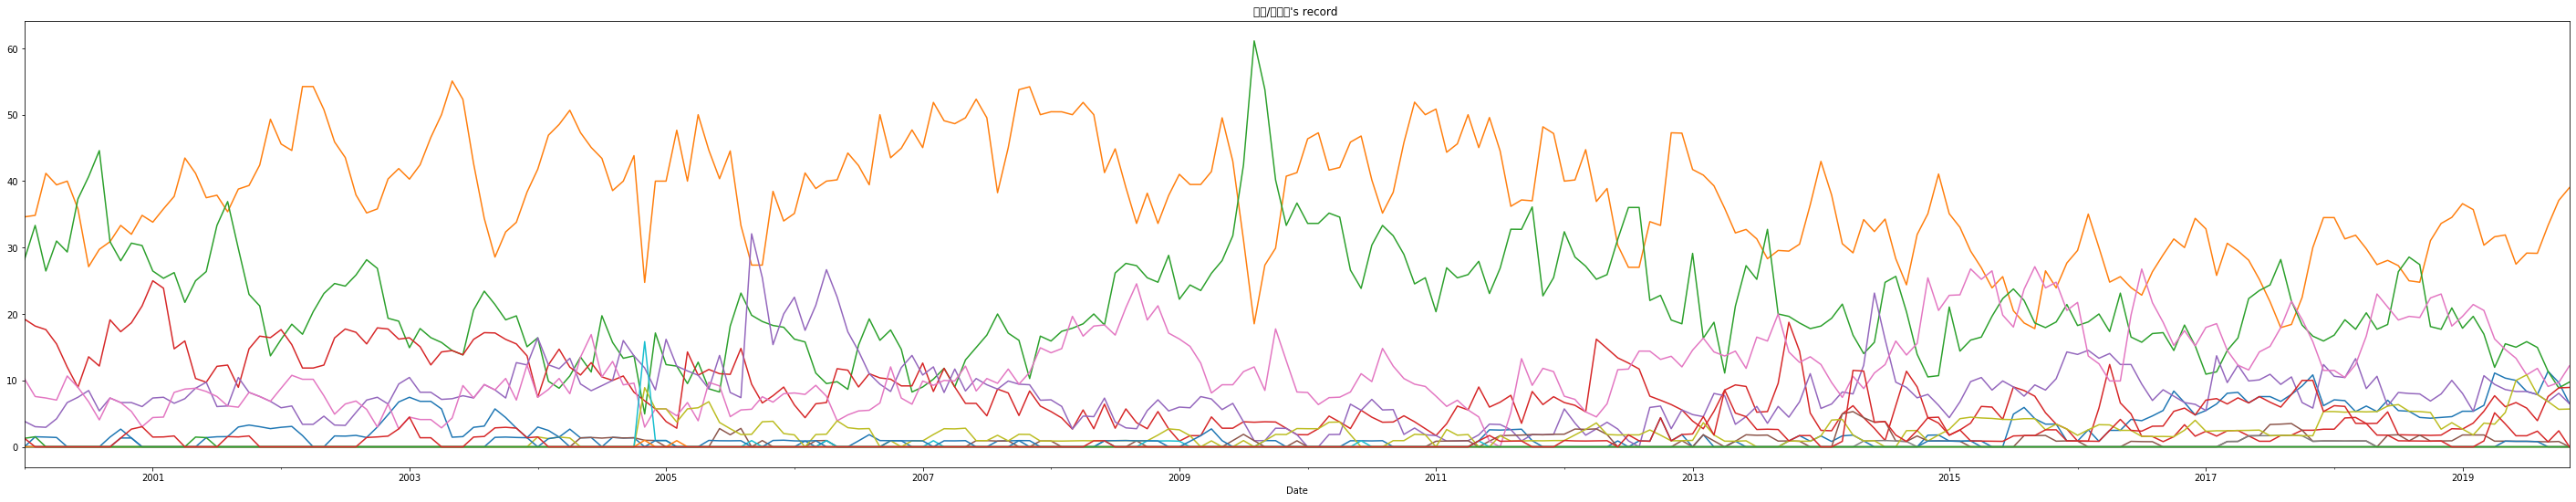

In [380]:
for key in mellon_df.keys():
    if key != 'Date' and key != '드라마OST' and key != '만화/게임OST' and key != '영화OST'and key != '-' and key != '애시드/퓨전/팝' and key != '클래식':
        mellon_df[key] = pd.to_numeric(mellon_df[key], errors='coerce')
        mellon_open = mellon_df[key].plot(title='%s\'s record '%key)
        fig = mellon_open.get_figure()
        fig.set_size_inches(50, 9)